In [16]:
from scipy.signal import convolve2d
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [49]:
threshold = 0.30
harris_window_size = 5
k = 0.04

img_low_res_path = './assets/desert_low_res.jpg'
img_high_res_path = './assets/desert_high_res.png'


def cv2_open_image(img_path):
    img = cv2.imread(img_path)
    return img

def cv2_get_gray_img_mat(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
    
img_low_res = cv2_open_image(img_low_res_path)
img_low_res_gray = cv2_get_gray_img_mat(img_low_res)

img_gaussian = cv2.GaussianBlur(img_low_res_gray,(harris_window_size,harris_window_size),0)    
Ix = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=harris_window_size)
Iy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=harris_window_size)

Ix2=np.square(Ix)
Iy2=np.square(Iy)
Ixy=Ix*Iy
        
harris_window = np.ones((harris_window_size, harris_window_size))
Sx2 = convolve2d(Ix2, harris_window, mode='same')
Sy2 = convolve2d(Iy2, harris_window, mode='same')
Sxy = convolve2d(Ixy, harris_window, mode='same')

det = Sx2 * Sy2 - (Sxy ** 2)
trace = Sx2 + Sy2

R = det - k * (trace ** 2)

cv2.normalize(R, R, 0, 1, cv2.NORM_MINMAX)

R[R < threshold] = 0    

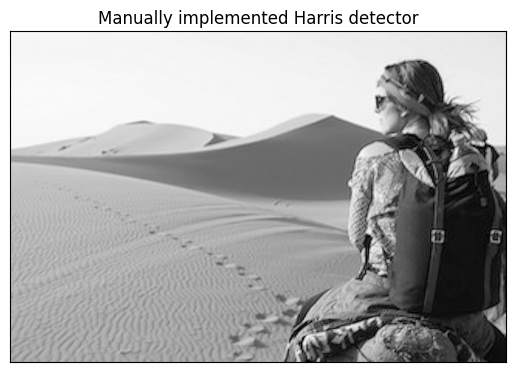

In [51]:

def my_harris(gray, harris_window_size,k,threshold):


    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    Ix = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)

    Ix2=np.square(Ix)
    Iy2=np.square(Iy)
    Ixy=Ix*Iy

    harris_window = np.ones((harris_window_size, harris_window_size))
    Sx2 = convolve2d(Ix2, harris_window, mode='same')
    Sy2 = convolve2d(Iy2, harris_window, mode='same')
    Sxy = convolve2d(Ixy, harris_window, mode='same')

    det = Sx2 * Sy2 - (Sxy ** 2)
    trace = Sx2 + Sy2

    R = det - k * (trace ** 2)
    cv2.normalize(R, R, 0, 1, cv2.NORM_MINMAX)
    R[R < threshold] = 0     
    
    # return R
    # cv2.imwrite("%s_threshold_%s.png"%(img_dir[5:-4],threshold), img)
    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)), plt.title("Manually implemented Harris detector")
    plt.xticks([]), plt.yticks([])
    plt.savefig('My_harris_detector-thresh_%s.png'%(threshold), bbox_inches='tight')
    plt.show()

matrix_R =  my_harris(img_low_res_gray, 5, 0.04, 0.30) # Change this path to one that will lead to your image

In [46]:
np.sum(R != matrix_R)


2453455

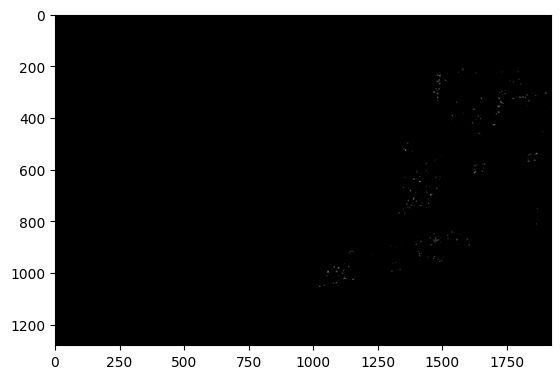

In [47]:
plt.imshow(matrix_R, cmap='gray')

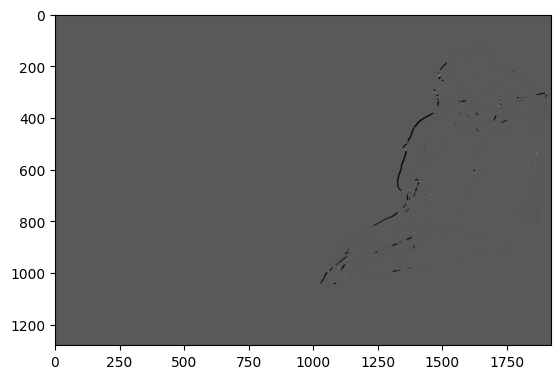

In [27]:
plt.imshow(R, cmap='gray')